In [30]:
# Installing necessary modules to use Twitter API.
!pip install tweepy    # This halps us access Twitter data.
!pip install textblob  # This helps us parse text.
!pip install plotly    # This makes it easy to plot graphs.
!pip install nltk      # This is also to parse text.
!pip install git+git://github.com/amueller/word_cloud.git

  Cloning git://github.com/amueller/word_cloud.git to /tmp/pip-zlvnyecx-build


In [31]:
# Setting up keys and secrets for developer's account.
consumer_key = "1kJPKOJAIe9zH8pGSyVi7z1tz"
consumer_secret = "QXUyYlQXNUR2dqpuXHUdYh6ydqAcM38OEoOjaXMMnMTVoVmUBu"
access_key = "916905592857387008-ZBH6h3zTTsdva1eGDYRDVD2cqPtm1E0"
access_secret = "h5hZTzvgF6uOnfmceURPL16xGocy0z9qubvjVRqe5FegI"

In [103]:
# Authorize to access Twitter data.
import tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

In [104]:
# Exploring what kinds of tweets come up for the query "sexual assault."
results = tweepy.Cursor(api.search,   # `api.search` specifies we want to perform a search.
                        q='#metoo', # `q` is the query, or the words we're searching for.
                        result_type='mixed') # We'll prioritize more popular results first.

In [86]:
tweets_file = open('tweet_texts.txt','w') 

first_tweets = []                  # We start out with an empty list called `first_ten`.
for tweet in results.items(1000): # Then, we'll iterate over the first 10 tweets in `results`...
    first_tweets.append(tweet)     # And we'll add each of those tweets to `first_ten`.
    tweets_file.write(tweet.text)
        

In [87]:
print(len(first_tweets))

1000


In [88]:
import re

tweets_file = open('tweet_texts.txt','r') 
tweet_text = tweets_file.read()
tweets_file.close()
tweet_text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', tweet_text, flags=re.MULTILINE)
tweet_text = re.sub(r'(#metoo)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', tweet_text, flags=re.MULTILINE)

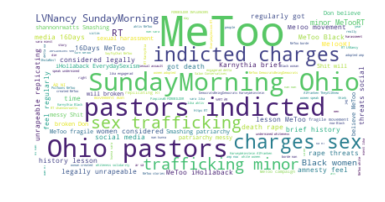

In [89]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#generating and formatting of wordcloud from the book text
wordcloud = WordCloud(background_color='white',
                      max_words=500,
                      max_font_size=50, 
                      random_state=42).generate(tweet_text) 


plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [105]:
MA_tweets_file = ('MA_tweets.txt', 'w')

for tweet in results.items(1000): # Then, we'll iterate over the first 10 tweets in `results`...
    first_tweets.append(tweet)     # And we'll add each of those tweets to `first_ten`.
    tweets_file.write(tweet.text)
        

TweepError: Twitter error response: status code = 429